Using TensorFlow version: 2.20.0
Loading data from 'mnist_train' and 'mnist_test'...
Data loaded successfully.
Training images shape: (60000, 784)
Training labels shape: (60000, 10)


C:\Users\e0352ax\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Model Summary ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


--- Starting Training ---
Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8396 - loss: 0.6311 - val_accuracy: 0.9029 - val_loss: 0.3540
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9057 - loss: 0.3366 - val_accuracy: 0.9170 - val_loss: 0.2940
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9176 - loss: 0.2897 - val_accuracy: 0.9280 - val_loss: 0.2604
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9273 - loss: 0.2590 - val_accuracy: 0.9336 - val_loss: 0.2392
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9340 - loss: 0.2357 - val_accuracy: 0.9376 - val_loss: 0.2202
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9398 - loss: 0.2166 - val_accuracy: 0.9414 - val_loss: 0.2036
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9441 - loss: 0.2007 - val_accuracy: 0.9442 - val_loss: 0.1911
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accurac

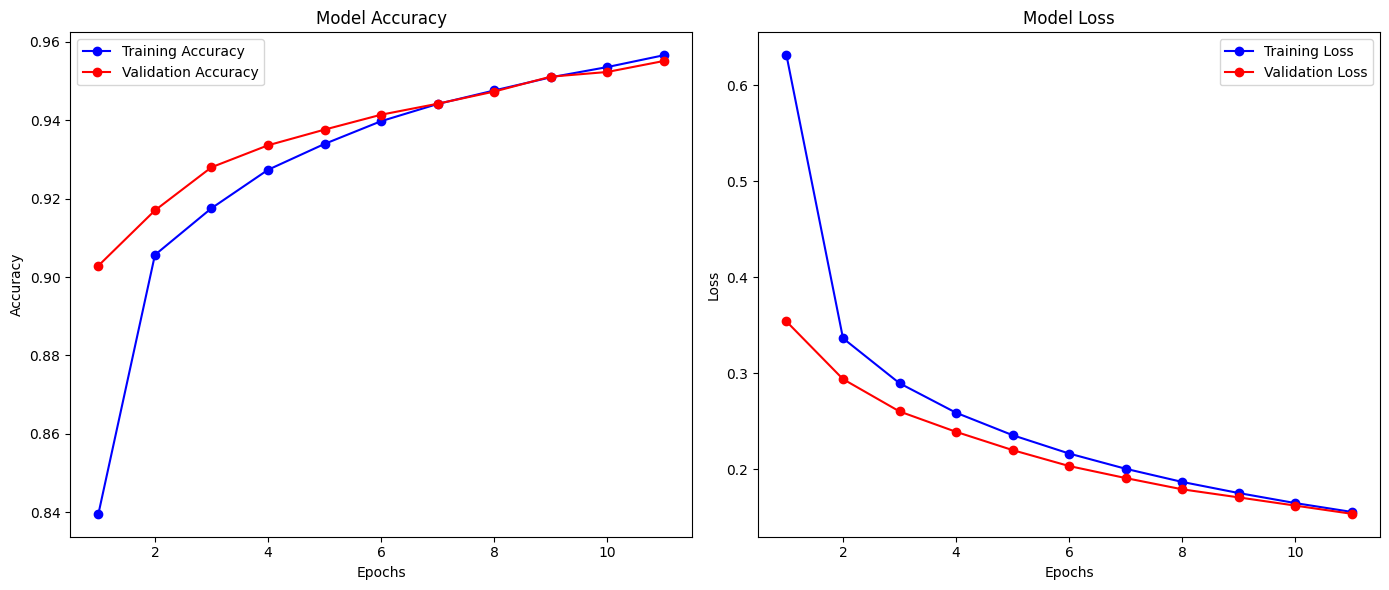

In [3]:
# PS-1, PS-12 : mnist feed forward

# a. Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(f"Using TensorFlow version: {tf.__version__}")

# b. Load data
# Use pandas to read CSVs (assuming no header row)
print("Loading data from 'mnist_train' and 'mnist_test'...")
train_df = pd.read_csv(r"D:\Desktop\LP-IV-datasets\MNIST(Ass2&3)\mnist_train.csv", header=0)
test_df = pd.read_csv(r"D:\Desktop\LP-IV-datasets\MNIST(Ass2&3)\mnist_test.csv", header=0)
print("Data loaded successfully.")

# Separate labels (col 0) and data (other cols)
# Convert to NumPy arrays
y_train_raw = train_df.iloc[:, 0].values
x_train_raw = train_df.iloc[:, 1:].values

y_test_raw = test_df.iloc[:, 0].values
x_test_raw = test_df.iloc[:, 1:].values

# --- Pre-process data ---
# 1. Normalize pixels to 0.0-1.0
x_train = x_train_raw.astype('float32') / 255.0
x_test = x_test_raw.astype('float32') / 255.0

# 2. One-hot encode labels
#    (e.g., 7 -> [0,0,0,0,0,0,0,1,0,0])
num_classes = 10
y_train = to_categorical(y_train_raw, num_classes)
y_test = to_categorical(y_test_raw, num_classes)

print(f"Training images shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")

# c. Define network
model = Sequential()

# Input layer (also first hidden layer)
# Input shape is 784 (28*28 pixels)
# Use 'relu' activation
model.add(Dense(128, activation='relu', input_shape=(784,)))

# Output layer
# 10 neurons for 10 classes
# 'softmax' for probabilities
model.add(Dense(num_classes, activation='softmax'))

# Model summary
print("\n--- Model Summary ---")
model.summary()

# d. Train model (SGD, 11 epochs)
# Compile model
# Use SGD optimizer
sgd_optimizer = SGD()
model.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("\n--- Starting Training ---")
# Fit the model
# Use test data for validation
history = model.fit(x_train, y_train,
                    epochs=11,
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    verbose=1)
print("--- Training Finished ---")

# e. Evaluate network
print("\n--- Evaluating Model on Test Data ---")
# Final evaluation on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# f. Plot loss and accuracy
print("\n--- Generating Plots ---")
# Get history data
history_dict = history.history
epochs_range = range(1, 12)  # 1 to 11

# Create figure
plt.figure(figsize=(14, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_dict['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs_range, history_dict['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_dict['loss'], 'bo-', label='Training Loss')
plt.plot(epochs_range, history_dict['val_loss'], 'ro-', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

Using TensorFlow version: 2.20.0
Loading data from 'mnist_train' and 'mnist_test'...
Data loaded successfully.
Training images shape (after reshape): (60000, 28, 28, 1)
Training labels shape (one-hot): (60000, 10)

--- Model Summary ---


C:\Users\e0352ax\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


--- Starting Training ---
Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9600 - loss: 0.1327 - val_accuracy: 0.9857 - val_loss: 0.0455
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9865 - loss: 0.0431 - val_accuracy: 0.9866 - val_loss: 0.0397
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9908 - loss: 0.0296 - val_accuracy: 0.9900 - val_loss: 0.0274
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9934 - loss: 0.0208 - val_accuracy: 0.9904 - val_loss: 0.0300
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9948 - loss: 0.0164 - val_accuracy: 0.9903 - val_loss: 0.0314
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9959 - loss: 0.0123 - val_accuracy: 0.9894 - val_loss: 0.0359
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9966 - loss: 0.0100 - val_accuracy: 0.9902 - val_loss: 0.0378
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12m

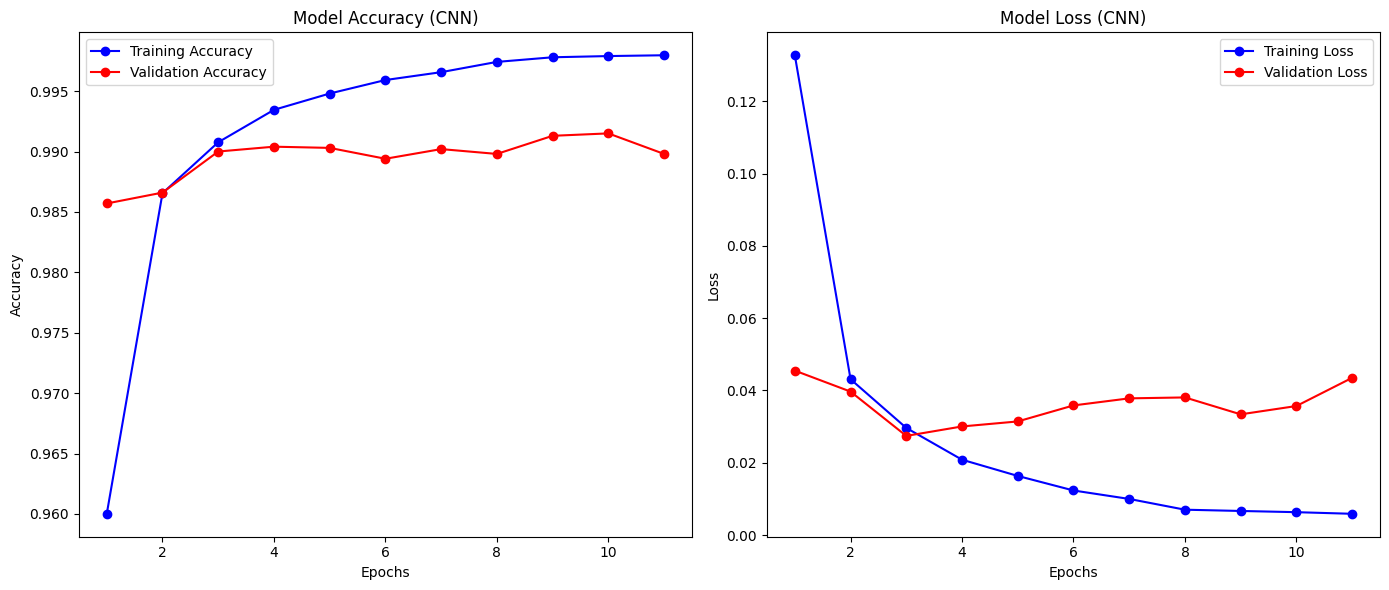

In [4]:
# PS-2, PS-13 : mnist Image classification

# --- Imports ---
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(f"Using TensorFlow version: {tf.__version__}")

# --- a. Loading and preprocessing the image data ---

# Load data using pandas, setting header=0
# This tells pandas to use the first row as column names
print("Loading data from 'mnist_train' and 'mnist_test'...")
train_df = pd.read_csv(r"D:\Desktop\LP-IV-datasets\MNIST(Ass2&3)\mnist_train.csv", header=0)
test_df = pd.read_csv(r"D:\Desktop\LP-IV-datasets\MNIST(Ass2&3)\mnist_test.csv", header=0)
print("Data loaded successfully.")

# Separate labels (col 0) and image data (other cols)
# .iloc works by position, so this is safe
y_train_raw = train_df.iloc[:, 0].values
x_train_raw = train_df.iloc[:, 1:].values

y_test_raw = test_df.iloc[:, 0].values
x_test_raw = test_df.iloc[:, 1:].values

# 1. Normalize pixels to 0.0-1.0
x_train_flat = x_train_raw.astype('float32') / 255.0
x_test_flat = x_test_raw.astype('float32') / 255.0

# 2. Reshape data for CNN
# CNNs need 4D input: (samples, height, width, channels)
# MNIST is 28x28 with 1 grayscale channel
img_rows, img_cols = 28, 28
num_samples_train = x_train_flat.shape[0]
num_samples_test = x_test_flat.shape[0]

x_train = x_train_flat.reshape(num_samples_train, img_rows, img_cols, 1)
x_test = x_test_flat.reshape(num_samples_test, img_rows, img_cols, 1)
input_shape_cnn = (img_rows, img_cols, 1)

print(f"Training images shape (after reshape): {x_train.shape}")

# 3. One-hot encode labels
num_classes = 10
y_train = to_categorical(y_train_raw, num_classes)
y_test = to_categorical(y_test_raw, num_classes)
print(f"Training labels shape (one-hot): {y_train.shape}")


# --- b. Defining the model's architecture ---

model = Sequential()

# 1st Convolutional Layer (32 filters, 3x3 kernel)
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape_cnn))

# 1st Pooling Layer (2x2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer (64 filters, 3x3 kernel)
model.add(Conv2D(64, (3, 3), activation='relu'))

# 2nd Pooling Layer (2x2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer (to transition from 2D to 1D)
model.add(Flatten())

# Fully Connected (Dense) Layer (128 neurons)
model.add(Dense(128, activation='relu'))

# Output Layer (10 classes, softmax for probabilities)
model.add(Dense(num_classes, activation='softmax'))

# Print model summary
print("\n--- Model Summary ---")
model.summary()


# --- c. Training the model ---

# Compile the model
# 'adam' is a popular and effective optimizer for CNNs
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("\n--- Starting Training ---")
# Train (fit) the model
history = model.fit(x_train, y_train,
                    epochs=11,  # Using 11 as before
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    verbose=1)
print("--- Training Finished ---")


# --- d. Estimating the model's performance ---

print("\n--- Evaluating Model on Test Data ---")
# 1. Final evaluation on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# 2. Plot training history
print("\n--- Generating Plots ---")
history_dict = history.history
epochs_range = range(1, 12)  # 1 to 11

# Create figure
plt.figure(figsize=(14, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_dict['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs_range, history_dict['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Model Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_dict['loss'], 'bo-', label='Training Loss')
plt.plot(epochs_range, history_dict['val_loss'], 'ro-', label='Validation Loss')
plt.title('Model Loss (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

Using TensorFlow version: 2.20.0
Loading data from 'cifar10_train.csv' and 'cifar10_test.csv'...
Data loaded successfully.
Training images shape: (50000, 3072)
Training labels shape: (50000, 10)


C:\Users\e0352ax\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Model Summary ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)


--- Starting Training ---
Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.3305 - loss: 1.8723 - val_accuracy: 0.3843 - val_loss: 1.7189
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.4067 - loss: 1.6588 - val_accuracy: 0.4336 - val_loss: 1.5905
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.4331 - loss: 1.5826 - val_accuracy: 0.4501 - val_loss: 1.5330
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.4598 - loss: 1.5213 - val_accuracy: 0.4391 - val_loss: 1.5674
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.4705 - loss: 1.4908 - val_accuracy: 0.4685 - val_loss: 1.4895
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.4820 - loss: 1.4539 - val_accuracy: 0.4772 - val_loss: 1.4699
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.4915 - loss: 1.4244 - val_accuracy: 0.4671 - val_loss: 1.4943
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accurac

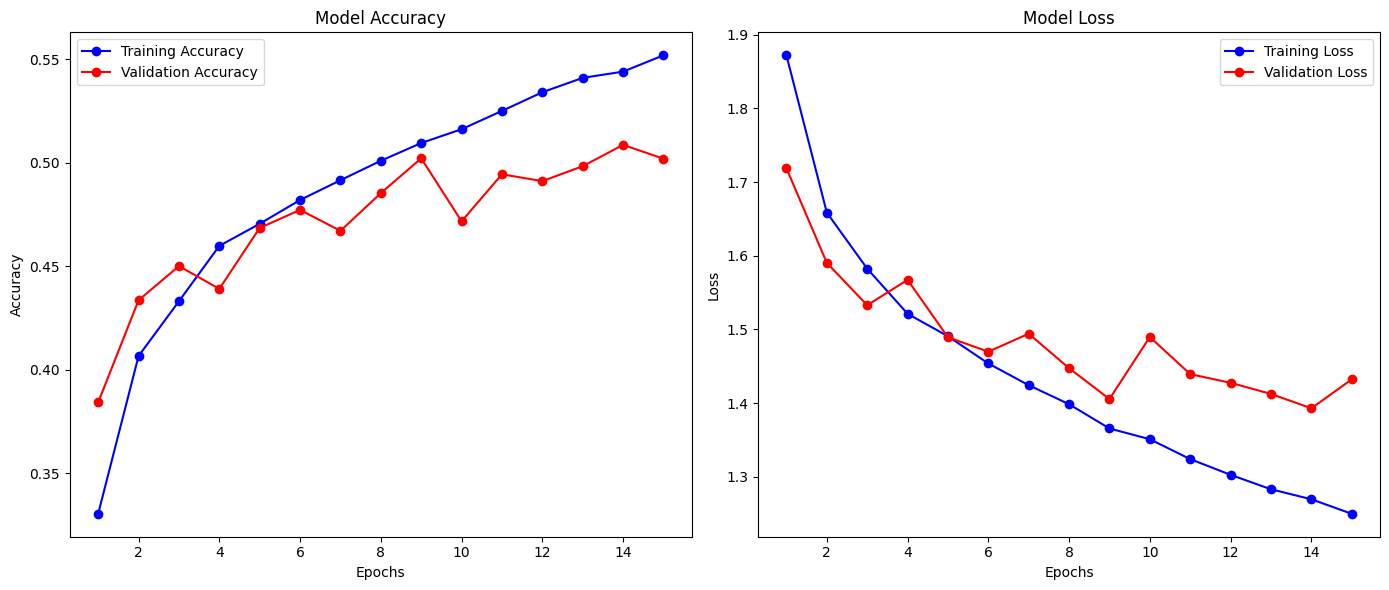

In [5]:
# PS-3 : cifar10 feed forward

# --- a. Import the necessary packages ---
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(f"Using TensorFlow version: {tf.__version__}")

# --- b. Load the training and testing data ---

# We will assume the files are named 'cifar10_train.csv' and 'cifar10_test.csv'
# header=0 tells pandas to use the first row as column names
print("Loading data from 'cifar10_train.csv' and 'cifar10_test.csv'...")

train_df = pd.read_csv(r"D:\Desktop\LP-IV-datasets\CIFR(Ass2&3)\train_data.csv", header=0)
test_df = pd.read_csv(r"D:\Desktop\LP-IV-datasets\CIFR(Ass2&3)\test_data.csv", header=0)

print("Data loaded successfully.")

# Separate labels (last column) from image data (all other columns)
# .iloc[:, -1] selects the last column
# .iloc[:, :-1] selects all columns EXCEPT the last one
y_train_raw = train_df.iloc[:, -1].values
x_train_raw = train_df.iloc[:, :-1].values

y_test_raw = test_df.iloc[:, -1].values
x_test_raw = test_df.iloc[:, :-1].values

# --- Pre-processing ---
# 1. Normalize pixel values from 0-255 to 0.0-1.0
x_train = x_train_raw.astype('float32') / 255.0
x_test = x_test_raw.astype('float32') / 255.0

# 2. One-hot encode the labels
num_classes = 10
y_train = to_categorical(y_train_raw, num_classes)
y_test = to_categorical(y_test_raw, num_classes)

# CIFAR-10 images are 32*32*3 = 3072 pixels
input_shape_fnn = (3072,)
print(f"Training images shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")


# --- c. Define the network architecture using Keras ---

# A simple Feedforward (Dense) network
model = Sequential()

# Input layer. The input_shape must be (3072,) for the flat pixel array
model.add(Dense(512, activation='relu', input_shape=input_shape_fnn))
# A second hidden layer to add capacity
model.add(Dense(256, activation='relu'))
# Output layer (10 classes for CIFAR-10)
model.add(Dense(num_classes, activation='softmax'))

# Print a summary of the model
print("\n--- Model Summary ---")
model.summary()


# --- d. Train the model using SGD/Adam optimizer ---

# We'll use 'adam' as it generally converges faster
# 'categorical_crossentropy' is used for one-hot encoded labels
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("\n--- Starting Training ---")
# CIFAR-10 is more complex than MNIST, so we may run for a few more epochs
# We use a larger batch size
history = model.fit(x_train, y_train,
                    epochs=15,  # 15 epochs
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1)  # Show progress bar
print("--- Training Finished ---")


# --- e. Evaluate the network ---
print("\n--- Evaluating Model on Test Data ---")
# Perform a final evaluation on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print("\n(Note: Feedforward networks typically have low accuracy on CIFAR-10.")
print("A CNN is required for good performance on this dataset.)")


# --- f. Plot the training loss and accuracy ---
print("\n--- Generating Plots ---")
# Get the data from the 'history' object
history_dict = history.history
epochs_range = range(1, 16)  # 1 to 15

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_dict['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs_range, history_dict['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_dict['loss'], 'bo-', label='Training Loss')
plt.plot(epochs_range, history_dict['val_loss'], 'ro-', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

Using TensorFlow version: 2.20.0
Loading data from 'cifar10_train.csv' and 'cifar10_test.csv'...
Data loaded successfully.
Training images shape (after reshape): (50000, 32, 32, 3)
Training labels shape (one-hot): (50000, 10)


C:\Users\e0352ax\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Model Summary ---


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)


--- Starting Training ---
Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 69ms/step - accuracy: 0.4334 - loss: 1.5504 - val_accuracy: 0.5667 - val_loss: 1.1993
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.5852 - loss: 1.1579 - val_accuracy: 0.6528 - val_loss: 0.9902
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.6504 - loss: 0.9933 - val_accuracy: 0.6881 - val_loss: 0.8820
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.6879 - loss: 0.8920 - val_accuracy: 0.7276 - val_loss: 0.7786
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.7155 - loss: 0.8172 - val_accuracy: 0.7300 - val_loss: 0.7676
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.7312 - loss: 0.7621 - val_accuracy: 0.7587 - val_loss: 0.6975
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.7472 - loss: 0.7232 - val_accuracy: 0.7608 - val_loss: 0.7096
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accurac

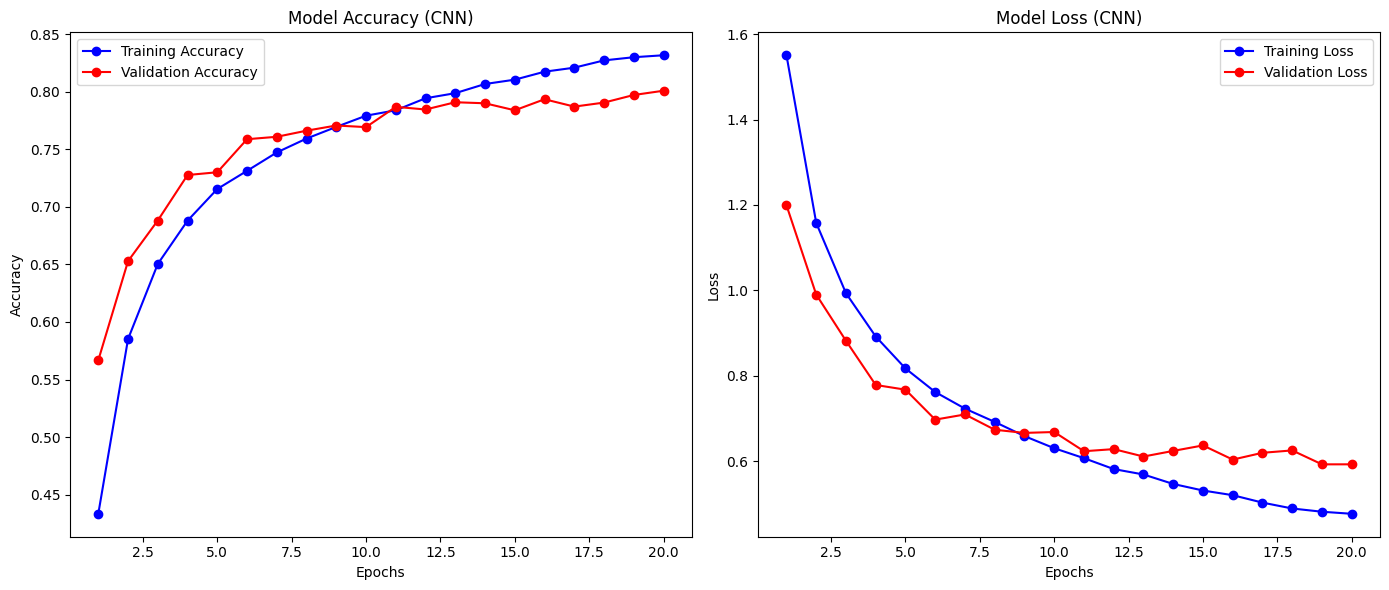

In [6]:
# PS-4 : cifar10 Image classification

# --- Imports ---
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(f"Using TensorFlow version: {tf.__version__}")

# --- a. Loading and preprocessing the image data ---

# Load data using pandas, setting header=0
print("Loading data from 'cifar10_train.csv' and 'cifar10_test.csv'...")

train_df = pd.read_csv(r"D:\Desktop\LP-IV-datasets\CIFR(Ass2&3)\train_data.csv", header=0)
test_df = pd.read_csv(r"D:\Desktop\LP-IV-datasets\CIFR(Ass2&3)\test_data.csv", header=0)

print("Data loaded successfully.")

# Separate labels (last column) and image data (all other columns)
y_train_raw = train_df.iloc[:, -1].values
x_train_raw = train_df.iloc[:, :-1].values

y_test_raw = test_df.iloc[:, -1].values
x_test_raw = test_df.iloc[:, :-1].values

# 1. Normalize pixels to 0.0-1.0
x_train_flat = x_train_raw.astype('float32') / 255.0
x_test_flat = x_test_raw.astype('float32') / 255.0

# 2. Reshape data for CNN
# CIFAR-10 images are 32x32 pixels with 3 color channels (RGB)
# (samples, height, width, channels)
img_rows, img_cols, channels = 32, 32, 3
num_samples_train = x_train_flat.shape[0]
num_samples_test = x_test_flat.shape[0]

x_train = x_train_flat.reshape(num_samples_train, img_rows, img_cols, channels)
x_test = x_test_flat.reshape(num_samples_test, img_rows, img_cols, channels)
input_shape_cnn = (img_rows, img_cols, channels)

print(f"Training images shape (after reshape): {x_train.shape}")

# 3. One-hot encode labels
num_classes = 10
y_train = to_categorical(y_train_raw, num_classes)
y_test = to_categorical(y_test_raw, num_classes)
print(f"Training labels shape (one-hot): {y_train.shape}")


# --- b. Defining the model's architecture ---

model = Sequential()

# 1st Convolutional Block
# padding='same' keeps the 32x32 size
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape_cnn))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # -> 16x16
model.add(Dropout(0.25)) # Dropout helps prevent overfitting

# 2nd Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # -> 8x8
model.add(Dropout(0.25))

# Flatten and Dense Layers
model.add(Flatten()) # Convert 3D feature maps to 1D vector
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) # Output layer

# Print model summary
print("\n--- Model Summary ---")
model.summary()


# --- c. Training the model ---

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("\n--- Starting Training ---")
# CIFAR-10 is complex, so we'll train for more epochs
history = model.fit(x_train, y_train,
                    epochs=20, # 20 epochs
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1)
print("--- Training Finished ---")


# --- d. Estimating the model's performance ---

print("\n--- Evaluating Model on Test Data ---")
# 1. Final evaluation on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print("(CNNs perform significantly better on CIFAR-10 than simple FNNs)")

# 2. Plot training history
print("\n--- Generating Plots ---")
history_dict = history.history
epochs_range = range(1, 21)  # 1 to 20

# Create figure
plt.figure(figsize=(14, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_dict['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs_range, history_dict['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Model Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_dict['loss'], 'bo-', label='Training Loss')
plt.plot(epochs_range, history_dict['val_loss'], 'ro-', label='Validation Loss')
plt.title('Model Loss (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

Using TensorFlow version: 2.20.0
Data shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.13745

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,421 (114.93 KB)

 Trainable params: 29,421 (114.93 KB)

 Non-trainable params: 0 (0.00 B)


--- Starting Autoencoder Training ---
Epoch 1/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7179 - loss: 0.2247 - val_accuracy: 0.8362 - val_loss: 0.1176
Epoch 2/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8521 - loss: 0.0701 - val_accuracy: 0.8750 - val_loss: 0.0819
Epoch 3/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8711 - loss: 0.0498 - val_accuracy: 0.8780 - val_loss: 0.0680
Epoch 4/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8782 - loss: 0.0418 - val_accuracy: 0.8961 - val_loss: 0.0489
Epoch 5/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8854 - loss: 0.0367 - val_accuracy: 0.8663 - val_loss: 0.0483
Epoch 6/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8952 - loss: 0.0303 - val_accuracy: 0.9037 - val_loss: 0.0345
Epoch 7/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8974 - loss: 0.0282 - val_accuracy: 0.8959 - val_loss: 0.0365
Epoch 8/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0

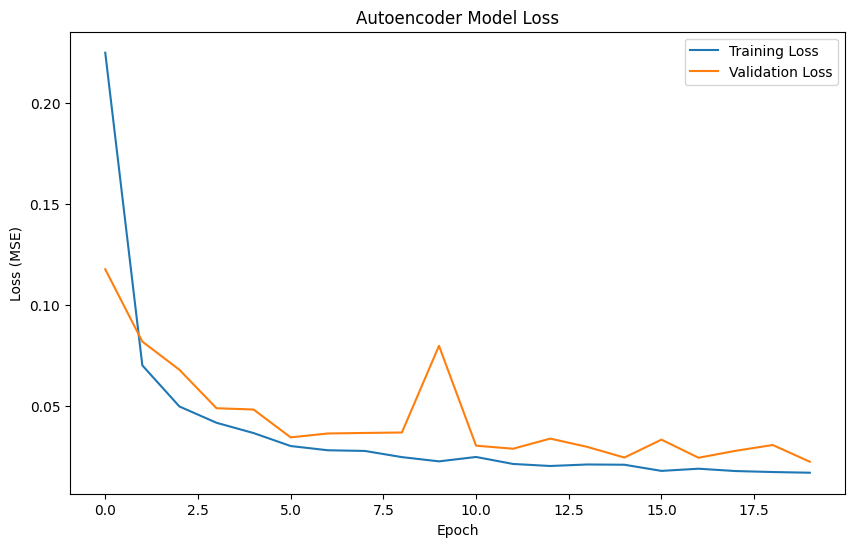

In [7]:
# PS-5, PS-14 : credit card autoencoder

# --- a. Import required libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

print(f"Using TensorFlow version: {tf.__version__}")

# --- b. Upload / access the dataset ---

# Load the dataset
# We assume the file is 'creditcard.csv' and the first row is the header

data = pd.read_csv(r"D:\Desktop\LP-IV-datasets\creditcardfraud-csv\creditcardfraud-csv\creditcard.csv", header=0)

print(f"Data shape: {data.shape}")
print(data.head())

# --- Preprocessing (Essential part of data access) ---

# 1. Scale 'Amount' and drop 'Time'
# 'Time' is usually dropped, and 'Amount' must be scaled.
# 'V1'-'V28' are already scaled (from PCA).
scaler = StandardScaler()
data['Scaled_Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data_processed = data.drop(['Time', 'Amount'], axis=1)

# 2. Separate features (X) and labels (y)
X = data_processed.drop('Class', axis=1)
y = data_processed['Class']

# 3. Split into train and test sets
# We need to stratify by 'y' to ensure both sets get some fraud samples
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Create the autoencoder's training data
# **CRITICAL**: Train the autoencoder ONLY on normal transactions
# This forces it to learn what "normal" looks like.
X_train_normal = X_train[y_train == 0]
X_train_fraud = X_train[y_train == 1]

print(f"\nTraining on {len(X_train_normal)} normal transactions.")
print(f"Testing on {len(X_test)} total transactions.")

# Define input dimension
input_dim = X_train_normal.shape[1] # Should be 29 (V1-V28, Scaled_Amount)

# --- c. Encoder converts it into latent representation ---

# This is the "bottleneck" (latent space)
encoding_dim = 16 

# Input Layer
input_layer = Input(shape=(input_dim,))

# Encoder layers
encoder = Dense(128, activation='relu')(input_layer)
encoder = Dense(64, activation='relu')(encoder)
encoder = Dense(32, activation='relu')(encoder)
latent_view = Dense(encoding_dim, activation='relu')(encoder)

# --- d. Decoder networks convert it back to the original input ---

# Decoder layers
decoder = Dense(32, activation='relu')(latent_view)
decoder = Dense(64, activation='relu')(decoder)
decoder = Dense(128, activation='relu')(decoder)

# Output layer (must have same dimension as input, linear activation)
output_layer = Dense(input_dim, activation='linear')(decoder)

# --- e. Compile the models ---

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
# We use 'mean_squared_error' to measure reconstruction loss
autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['accuracy']) # Accuracy isn't very useful here, loss is key

autoencoder.summary()

# --- Training the Autoencoder ---
# Note: We train X_train_normal on X_train_normal (input=target)
print("\n--- Starting Autoencoder Training ---")
history = autoencoder.fit(
    X_train_normal, X_train_normal,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test), # Validate on the full test set
    verbose=1
)
print("--- Training Finished ---")


# --- Evaluating the Anomaly Detection Performance ---

print("\n--- Evaluating Anomaly Detector ---")
# 1. Get reconstruction loss for all test samples
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)

# Create a DataFrame for easy analysis
error_df = pd.DataFrame({'reconstruction_error': mse,
                         'true_class': y_test})

# 2. See how the error differs for normal vs. fraud
print("\nReconstruction Error Statistics:")
print(error_df.groupby('true_class')['reconstruction_error'].describe())
# 

# 3. Find the best threshold
# We use a Precision-Recall curve to find the threshold that
# maximizes the F1-score (balance between precision and recall)
precision, recall, thresholds = precision_recall_curve(y_test, mse)

# Calculate F1 score for each threshold
# Add epsilon (1e-9) to avoid division by zero
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"\nBest threshold (from max F1-score): {best_threshold:.6f}")

# 4. Classify based on the threshold
y_pred = [1 if e > best_threshold else 0 for e in error_df.reconstruction_error.values]

# 5. Show the final Classification Report
print("\n--- Classification Report ---")
# This tells us how well our anomaly detector performed
print(classification_report(y_test, y_pred, target_names=["Class 0 (Normal)", "Class 1 (Fraud)"]))

# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Model Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [10]:
# PS-6, PS-7, PS-8, PS-15 : CBOW

# a. Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
import numpy as np
import re

# --- a. Data preparation ---
print("--- a. Data preparation ---")

# 1. Load and clean text
try:
    with open(r"D:\Desktop\LP-IV-datasets\CBOW(Ass5)\CBOW.txt", 'r') as f:
        text = f.read()
except FileNotFoundError:
    print("ERROR: 'text1.txt' not found. Please create this file.")
    exit()

text_clean = text.lower()
text_clean = re.sub(r'[^a-z\s]', '', text_clean) # Keep only letters/spaces

# 2. Tokenize and build vocabulary
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text_clean])
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1 # +1 for padding token 0

# 3. Convert text to integer sequences
all_sequences = tokenizer.texts_to_sequences(text_clean.split('\n'))
corpus_indices = [idx for seq in all_sequences for idx in seq]
print(f"Vocabulary size: {vocab_size - 1} words")

# --- b. Generate training data (CBOW) ---
print("\n--- b. Generate training data ---")
# Predict a target word (center) from its context (surrounding words)
window_size = 2  # 2 words before, 2 words after
contexts = []
targets = []

for i in range(window_size, len(corpus_indices) - window_size):
    # Context words (X)
    context_indices = corpus_indices[i - window_size : i] + \
                      corpus_indices[i + 1 : i + window_size + 1]
    # Target word (y)
    target_word_index = corpus_indices[i]
    
    contexts.append(context_indices)
    targets.append(target_word_index)

# Convert to NumPy arrays
X = np.array(contexts)
# One-hot encode the target labels
y = to_categorical(targets, num_classes=vocab_size)

print(f"Number of training samples: {len(X)}")

# --- c. Train model ---
print("\n--- c. Train model ---")

embedding_dim = 50  # Size of the word vector
context_length = window_size * 2 # = 4

model = Sequential()
# 1. Embedding Layer (Turns word indices into vectors)
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=context_length,
                    name="word_embedding"))

# 2. Pooling Layer (Averages the context word vectors)
model.add(GlobalAveragePooling1D())

# 3. Output Layer (Predicts the target word)
model.add(Dense(vocab_size, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train
print("\nStarting model training...")
model.fit(X, y, epochs=100, verbose=1)
print("Training finished.")

# --- d. Output ---
print("\n--- d. Output (Word Embeddings) ---")

# The "output" is the learned weights from the embedding layer
embedding_weights = model.get_layer("word_embedding").get_weights()[0]

print(f"Shape of embedding weights: {embedding_weights.shape}")

# Show an example vector for the word 'fox'
example_word = 'virus'
if example_word in word_index:
    example_index = word_index[example_word]
    example_vector = embedding_weights[example_index]
    print(f"\nLearned vector for '{example_word}':\n{example_vector}")
else:
    print(f"\n'{example_word}' not found in vocabulary.")

--- a. Data preparation ---
Vocabulary size: 92 words

--- b. Generate training data ---
Number of training samples: 173

--- c. Train model ---


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ word_embedding (Embedding)           │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0116 - loss: 4.5313  
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0925 - loss: 4.5206 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1445 - loss: 4.5111 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1618 - loss: 4.5017
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2139 - loss: 4.4921 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2370 - loss: 4.4821 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2601 - loss: 4.4715 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2659 - loss: 4.4605 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2717 - loss: 4.4486
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2948 - loss: 4.4360 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2948 - loss: 4.4223
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10m

In [ ]:
# PS-9, PS-10, PS-11, PS-16 : Object Detection 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import os

print(f"Using TensorFlow version: {tf.__version__}")

# --- Setup: Define Paths and Image Parameters ---
IMG_WIDTH, IMG_HEIGHT = 224, 224 # VGG16 standard size
BATCH_SIZE = 32
DATA_DIR = r"D:\Desktop\LP-IV-datasets\Object Detection(Ass6)\caltech-101-img"
WEIGHTS_PATH = r"D:\Desktop\LP-IV-datasets\Object Detection(Ass6)\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
# Check if files exist
if not os.path.exists(DATA_DIR):
    print(f"Error: Dataset folder '{DATA_DIR}' not found.")
    exit()
if not os.path.exists(WEIGHTS_PATH):
    print(f"Error: Weights file '{WEIGHTS_PATH}' not found.")
    exit()

# --- Setup: Load and Preprocess Data ---
# We use ImageDataGenerator to load from folders.
# We also split the data into 80% training and 20% validation.
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values
    validation_split=0.2,      # Hold back 20% for validation
    shear_range=0.2,           # Add some data augmentation
    zoom_range=0.2,
    horizontal_flip=True
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training' # Set as training data
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' # Set as validation data
)

# Get the number of classes (subfolders)
num_classes = train_generator.num_classes
print(f"Found {num_classes} classes (subfolders) in '{DATA_DIR}'.")

# --- a. Load in a pre-trained CNN model ---
print("\n--- a. Loading pre-trained VGG16 model ---")
# 1. Initialize VGG16 with the correct input shape
#    We set 'weights=None' because we will load them from your file
base_model = VGG16(
    weights=None, 
    include_top=False, # Do not include the final classifier
    input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)
)

# 2. Load the weights from your specific file
base_model.load_weights(WEIGHTS_PATH)
print("Model and custom weights loaded successfully.")


# --- b. Freeze parameters in lower convolutional layers ---
print("\n--- b. Freezing base model layers ---")
# We freeze all layers in the base model so we only train our new classifier
for layer in base_model.layers:
    layer.trainable = False


# --- c. Add custom classifier ---
print("\n--- c. Adding new custom classifier ---")
# 1. Get the output of the base model
x = base_model.output

# 2. Add our new layers
x = Flatten()(x) # Flatten the 3D features to 1D
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout for regularization
predictions = Dense(num_classes, activation='softmax')(x) # Output layer

# 3. Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

print("New model created with VGG16 base and custom head.")
model.summary()


# --- d. Train classifier layers on training data ---
print("\n--- d. Training the custom classifier (Phase 1) ---")
# Compile the model for the first round of training
model.compile(
    optimizer=Adam(learning_rate=1e-4), # Use Adam with a moderate learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model (e.g., for 10 epochs)
# We only train the new Dense/Dropout layers
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


# --- e. Fine-tune hyperparameters and unfreeze layers ---
print("\n--- e. Fine-tuning the model (Phase 2) ---")
# Now we unfreeze the top block of VGG16 (block5) to fine-tune it
print("Unfreezing 'block5' of VGG16...")
for layer in base_model.layers:
    if layer.name.startswith('block5'):
        layer.trainable = True

# Re-compile the model with a VERY low learning rate for fine-tuning
# This prevents destroying the learned weights
model.compile(
    optimizer=Adam(learning_rate=1e-5), # Must be very low!
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training (fine-tuning) for 10 more epochs
history_fine_tune = model.fit(
    train_generator,
    epochs=20, # Continue from epoch 10 to 20
    initial_epoch=history.epochs, # Start where we left off
    validation_data=validation_generator
)

print("\n--- Model training complete ---")

# Evaluate the final model
print("\nFinal Model Evaluation:")
final_loss, final_accuracy = model.evaluate(validation_generator)
print(f"Final Validation Loss: {final_loss:.4f}")
print(f"Final Validation Accuracy: {final_accuracy * 100:.2f}%")

Using TensorFlow version: 2.20.0
Found 7357 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.
Found 102 classes (subfolders) in 'D:\Desktop\LP-IV-datasets\Object Detection(Ass6)\caltech-101-img'.

--- a. Loading pre-trained VGG16 model ---
Model and custom weights loaded successfully.

--- b. Freezing base model layers ---

--- c. Adding new custom classifier ---
New model created with VGG16 base and custom head.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,612,582 (105.33 MB)

 Trainable params: 12,897,894 (49.20 MB)

 Non-trainable params: 14,714,688 (56.13 MB)


--- d. Training the custom classifier (Phase 1) ---
Epoch 1/10
  1/230 ━━━━━━━━━━━━━━━━━━━━ 26:31 7s/step - accuracy: 0.0000e+00 - loss: 5.0638